In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key

In [2]:
file = '../winedf_loc_cz2.csv'
df = pd.read_csv(file)

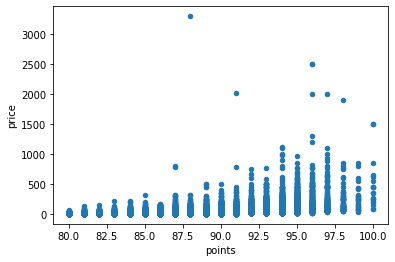

In [3]:

df.plot('points','price' ,kind='scatter')

In [25]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.
0,0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,41.387933,-7.276971,7,2011.0,Csb,"Mediterranean, warm summer"
1,1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40.089829,-88.248177,7,2013.0,Cfb,"Marine west coast, warm summer"
2,2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,42.212252,-85.891725,7,2013.0,Cfb,"Marine west coast, warm summer"
3,3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,42.343889,-71.101111,7,2012.0,Cfb,"Marine west coast, warm summer"
4,4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,32.905753,-117.230246,7,2011.0,Cfa,"Humid subtropical, no dry season"


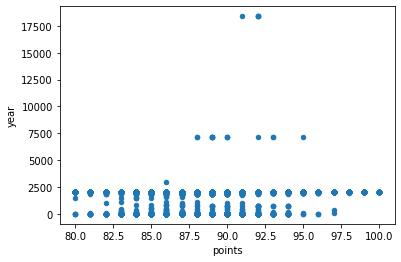

In [5]:
df.plot('points','year',kind='scatter')

In [6]:
cleandf = df.loc[df.year < 2019 , : ]

In [7]:
cleandf = cleandf.loc[cleandf.year > 1990 , :]

In [8]:
cleandf = cleandf.fillna('not avail')
cleandf = cleandf.loc[cleandf.country != 'not avail']
cleandf = cleandf.loc[cleandf.variety != 'not avail']
cleandf.describe()

,Unnamed: 0,points,price,Lat,Lng,heat weights,year
count,113351.000000,113351.000000,113351.000000,113351.000000,113351.000000,113351.000000,113351.000000
mean,6998.023229,88.476776,35.614419,37.217489,-62.873925,8.476776,2010.739623
std,4688.707275,3.047601,41.083446,16.523710,58.796549,3.047601,3.560501
min,0.000000,80.000000,4.000000,-54.050000,-156.380849,0.000000,1991.000000
25%,3294.000000,86.000000,17.000000,37.225606,-120.069035,6.000000,2009.000000
50%,6587.000000,88.000000,26.000000,40.579011,-81.248872,8.000000,2011.000000
75%,9874.000000,91.000000,42.000000,44.700836,0.545383,11.000000,2013.000000
max,22533.000000,100.000000,3300.000000,74.609012,176.916056,20.000000,2017.000000


In [9]:
cleandf = cleandf.drop(columns=['Unnamed: 0','taster_twitter_handle','designation','province'])

In [10]:
price = cleandf.groupby('price')
year = cleandf.groupby('year')
variety = cleandf.groupby('variety')
clizone = cleandf.groupby('Climate Zone')
score = cleandf.groupby('points')

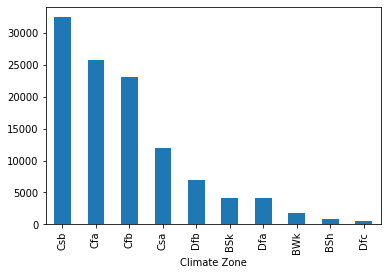

In [11]:
a = clizone.count()
a = a.sort_values('variety',ascending=False).head(10)
a['variety'].plot(kind='bar')


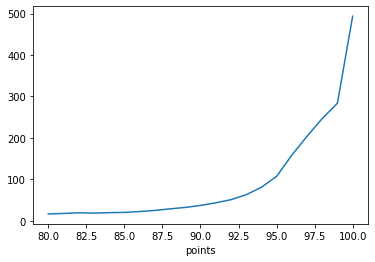

In [12]:
a = score['price'].mean()
a.plot()

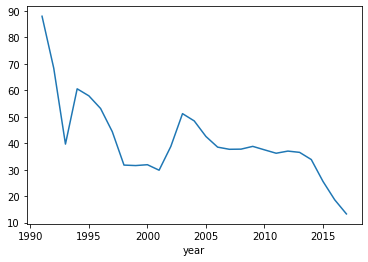

In [13]:
a = year['price'].mean()
a.plot()


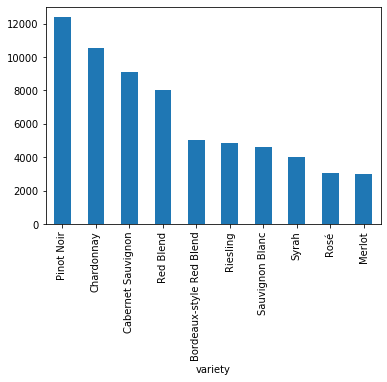

In [14]:
a = variety.count()
a = a.sort_values('price',ascending=False).head(10)
a.title.plot(kind='bar')


In [15]:
cleandf['raiting'] = cleandf['heat weights']*5
#newdf = cleandf.loc[cleandf.points >= 90 , : ]
newdf = cleandf.sort_values(by='raiting', ascending=False)
newdf.to_csv('thefile.csv')

In [21]:
import gmaps
gmaps.configure(api_key=g_key)
locations = cleandf[["Lat", "Lng"]].astype(float)
humidity = cleandf["heat weights"].astype(float)
#fig = gmaps.figure()
fig = gmaps.figure(layout={
        'width': '1000px',
        'height': '500px',
        'padding': '3px',
        'border': '1px solid black'})

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=30,
                                 point_radius = 0.4)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', padding='3px', width='1000px'))

In [17]:
import gmaps
gmaps.configure(api_key=g_key)
locations = newdf[["Lat", "Lng"]].astype(float)
humidity = newdf["heat weights"].astype(float)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=30,
                                 point_radius = 3)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))